In [4]:
import os
from helper import init_ipynb
envfound = init_ipynb()

DIR = os.environ["DIR_PATH"] if envfound else None
DEVICE = os.environ["DEVICE"] if envfound else None

In [ ]:
with open("./docs/benchmarks/mcq/raw.txt", 'r') as f:
    raw = f.read()

In [40]:
raw

'Following are the preferred responses for the Multiple-Choice Questions in this CONTINUUM issue. The questions and answer options are repeated, and the preferred response appears in bold print followed by an explanation and a reference with which you may seek more specific information. You are encouraged to review the responses and explanations carefully to evaluate your general understanding of the course material. The comments and references included with each question are intended to encourage independent study.\n\n    ►1. Which of the following is the major role of the neurologist after a diagnosis of psychogenic nonepileptic events?\n        A. appropriately weaning antiepileptic drugs\n        B. describing events in ambiguous terms\n        C. ensuring that patients continue to refrain from driving a motor vehicle\n        D. ordering follow-up EEG in 6 to 12 months\n        E. prescribing a selective serotonin reuptake inhibitor or other antidepressant\n\nThe correct answer is

In [41]:
SEP = "►"
len(raw.split(SEP)[1:]), "questions"

(40, 'questions')

In [52]:
trimed = [[_ for _ in question.split("\n") if _.strip() != ''] for question in raw.split(SEP)[1:]]
processed = []
for question in trimed:
    complete = {}
    q = "\n".join(question[:-1])
    a = question[-1]
    complete["answer"] = a.replace("The correct answer is ", "")[0]
    complete["answer_full"] = a
    complete["index"], complete["question"] = q.split(". ")[0], ". ".join(q.split(". ")[1:])
    processed.append(complete)

In [53]:
processed

[{'answer': 'A',
  'answer_full': 'The correct answer is A (appropriately weaning antiepileptic drugs). After a diagnosis of psychogenic nonepileptic attacks, one of the major roles of the neurologist is the rational weaning of antiepileptic medications. This should be done with the caveat that coexistent epilepsy may also be present, so the physician needs to keep an open mind regarding new events (although routine surveillance EEGs are not necessarily indicated). Driving restrictions should be handled on an individual case basis, although most patients can return to driving with little chance of injury. Neurologists should use unambiguous terms when describing the diagnosis to the patient and other providers so that the misdiagnosis of epilepsy is not perpetuated. While mental health care is often needed, the routine prescription of antidepressants is not always indicated. For more information, refer to page 724 of the CONTINUUM article “Nonepileptic Behavioral Disorders: Diagnosis a

In [54]:
import json
with open("docs/benchmarks/mcq/processed.json", "w") as f:
    json.dump(processed, f)

In [40]:
OFFSET_A = 65
letters = {i - OFFSET_A: chr(i) for i in range(OFFSET_A, 65+26)}
letters

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

### Self assessment 

In [18]:
import pandas as pd


selfassessment = pd.read_excel("docs/benchmarks/self_assessment/AES7-8.xlsx").T
cols = selfassessment.loc["Numéro"].values
selfassessment = selfassessment.drop("Numéro")
selfassessment.columns = cols
selfassessment = selfassessment.reset_index()

In [21]:
aes8, aes7 = selfassessment.iloc[:100], selfassessment.iloc[100:]

In [37]:
print(aes7["Question"].values[0])

Based on the ILAE consensus classification, which of the following findings are seen in the most common histopathological subtype of hippocampal sclerosis?
A. Neuronal cell loss in the CA2 and CA3 regions
B. Neuronal cell loss in the CA1 and CA3 regions
C. Neuronal cell loss in the CA1 and CA4 regions
D. Neuronal cell loss in the dentate regions


In [32]:
print(aes7["Input "].values[1])

You will be given a multiple choice question, please select the correct answer :  "What was the median seizure reduction 9 years after implantaiton in long term studies of safety and efficacy for brain-responsive neurostimulation (RNS)?
A. 55%
B. 63%
C. 75%
D. 90%"


In [58]:
aes8 = aes8.drop("Is_image", axis=1)
aes7 = aes7.drop("Is_image", axis=1)
columns = ["index", "question", "answer", "human_accuracy", "difficulty", "topic", "answer_full", "ref.", "input"]
aes7.columns = columns
aes8.columns = columns

In [62]:
for t, w in [("aes7", aes7), ("ae8", aes8)]:
    with open(f"docs/benchmarks/self_assessment/{t}_processed.json", "w") as f:
        json.dump(w.to_dict("records"), f)

### Process datasets 

In [3]:
from models import (get_mimic_iv_notes, get_pmc_patients)

In [6]:
mimic = get_mimic_iv_notes("disc")
pmc = get_pmc_patients()

In [12]:
import pandas as pd

mimic = pd.read_csv("docs/mimic-iv-note-deidentified-free-text-clinical-notes-2.2/note/discharge.csv")
mimic_train, mimic_test =mimic.iloc[:int(len(mimic.index) * 0.8)], mimic.iloc[int(len(mimic.index) * 0.8):]

In [13]:
mimic_train.to_csv("docs/mimic-iv-note-deidentified-free-text-clinical-notes-2.2/note/discharge.csv")
mimic_test.to_csv("docs/mimic-iv-note-deidentified-free-text-clinical-notes-2.2/note/discharge_test.csv")

In [19]:
x = pmc.train_test_split(test_size=.2)
pmc_train, pmc_test = x["train"], x["test"]

In [20]:
pmc_train, pmc_test

(Dataset({
     features: ['text'],
     num_rows: 3303
 }),
 Dataset({
     features: ['text'],
     num_rows: 826
 }))

In [21]:
# pmc.save_to_disk("docs/pmc_patiens_fil_full.hf")
pmc_train.save_to_disk("docs/pmc_patiens_fil_train.hf")
pmc_test.save_to_disk("docs/pmc_patiens_fil_test.hf")

Saving the dataset (0/1 shards):   0%|          | 0/3303 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/826 [00:00<?, ? examples/s]

### FULL AES :

In [5]:
import pandas as pd


fullaes = pd.read_excel("docs/benchmarks/self_assessment/AES_7_8_9_Questions.xlsx", header=1).drop("Unnamed: 0", axis=1)

In [6]:
fullaes["Is_image"] = fullaes["Is_image"].apply(lambda x : x == "yes")
fullaes.head(5)

,Numéro,Question,Input,Official_answer,Human accuracy,Difficulty,Is_image,Topic,Official_explanation,Reference
0,AES9-1,A 5 day old term infant develops focal clonic ...,"You will be given a multiple choice question, ...",A,0.8182,easy,False,Classification,The case describes a patient with self limited...,"Zuberi, Sameer M., Elaine Wirrell, Elissa Yoza..."
1,AES9-2,A 20-year-old female with drug-resistant epile...,"You will be given a multiple choice question, ...",C,0.6591,medium,True,Evaluation,The MRI showed left hippocampal sclerosis (HS)...,"Salmenpera TM, Duncan JS. Imaging in epilepsy...."
2,AES9-3,A 35 year old woman in the waiting room of the...,"You will be given a multiple choice question, ...",A,0.8409,easy,False,Management,In randomized clinical trials of status epilep...,"Glaser T, Shinnar S, Gloss D et al Evidence-Ba..."
3,AES9-4,A 42 year old woman has a 19 year history of s...,"You will be given a multiple choice question, ...",B,0.7273,easy,True,Mechanisms of the epilepsies,The MRI shows left mesial temporal sclerosis. ...,"Blumcke, I., Thom, M., Aronica, E., Armstrong,..."
4,AES9-5,An EEG is performed on a 13-year-old patient. ...,"You will be given a multiple choice question, ...",D,0.9318,easy,True,Routine EEG,The posterior slow wave of youth is maximally ...,"Kane N, Acharya J, Benickzy S, Caboclo L, Finn..."


In [7]:
fullaes["AES"] = fullaes["Numéro"].apply(lambda _ : _.split("-")[0][-1])
fullaes.head(5)

,Numéro,Question,Input,Official_answer,Human accuracy,Difficulty,Is_image,Topic,Official_explanation,Reference,AES
0,AES9-1,A 5 day old term infant develops focal clonic ...,"You will be given a multiple choice question, ...",A,0.8182,easy,False,Classification,The case describes a patient with self limited...,"Zuberi, Sameer M., Elaine Wirrell, Elissa Yoza...",9
1,AES9-2,A 20-year-old female with drug-resistant epile...,"You will be given a multiple choice question, ...",C,0.6591,medium,True,Evaluation,The MRI showed left hippocampal sclerosis (HS)...,"Salmenpera TM, Duncan JS. Imaging in epilepsy....",9
2,AES9-3,A 35 year old woman in the waiting room of the...,"You will be given a multiple choice question, ...",A,0.8409,easy,False,Management,In randomized clinical trials of status epilep...,"Glaser T, Shinnar S, Gloss D et al Evidence-Ba...",9
3,AES9-4,A 42 year old woman has a 19 year history of s...,"You will be given a multiple choice question, ...",B,0.7273,easy,True,Mechanisms of the epilepsies,The MRI shows left mesial temporal sclerosis. ...,"Blumcke, I., Thom, M., Aronica, E., Armstrong,...",9
4,AES9-5,An EEG is performed on a 13-year-old patient. ...,"You will be given a multiple choice question, ...",D,0.9318,easy,True,Routine EEG,The posterior slow wave of youth is maximally ...,"Kane N, Acharya J, Benickzy S, Caboclo L, Finn...",9


In [8]:
fullaes

,Numéro,Question,Input,Official_answer,Human accuracy,Difficulty,Is_image,Topic,Official_explanation,Reference,AES
0,AES9-1,A 5 day old term infant develops focal clonic ...,"You will be given a multiple choice question, ...",A,0.8182,easy,False,Classification,The case describes a patient with self limited...,"Zuberi, Sameer M., Elaine Wirrell, Elissa Yoza...",9
1,AES9-2,A 20-year-old female with drug-resistant epile...,"You will be given a multiple choice question, ...",C,0.6591,medium,True,Evaluation,The MRI showed left hippocampal sclerosis (HS)...,"Salmenpera TM, Duncan JS. Imaging in epilepsy....",9
2,AES9-3,A 35 year old woman in the waiting room of the...,"You will be given a multiple choice question, ...",A,0.8409,easy,False,Management,In randomized clinical trials of status epilep...,"Glaser T, Shinnar S, Gloss D et al Evidence-Ba...",9
3,AES9-4,A 42 year old woman has a 19 year history of s...,"You will be given a multiple choice question, ...",B,0.7273,easy,True,Mechanisms of the epilepsies,The MRI shows left mesial temporal sclerosis. ...,"Blumcke, I., Thom, M., Aronica, E., Armstrong,...",9
4,AES9-5,An EEG is performed on a 13-year-old patient. ...,"You will be given a multiple choice question, ...",D,0.9318,easy,True,Routine EEG,The posterior slow wave of youth is maximally ...,"Kane N, Acharya J, Benickzy S, Caboclo L, Finn...",9
...,...,...,...,...,...,...,...,...,...,...,...
295,AES7-Question 96,Which of the following evidence-based self-man...,"You will be given a multiple choice question, ...",D,0.7750,easy,False,Management,"For individuals with chronic disease, self-man...","1. Sajatovic M, Johnson EK, Fraser RT, et al. ...",7
296,AES7-Question 97,Increased uptake of which of the following PET...,"You will be given a multiple choice question, ...",A,0.4450,medium,False,Evaluation,Epileptogenic tubers in tuberous sclerosis dem...,Chugani DC et al. Imaging epileptogenic tubers...,7
297,AES7-Question 98,What percentage of patients with juvenile myoc...,"You will be given a multiple choice question, ...",B,0.5000,medium,False,Mechanisms of the epilepsies,Long-term studies of children with juvenile my...,Camfield CS and Camfield PR. Juvenile myocloni...,7
298,AES7-Question 99,Which of the following HLA alleles is associat...,"You will be given a multiple choice question, ...",B,0.8450,easy,False,Mechanisms of the epilepsies,HLA-B*1502 is associated with a strongly incre...,"Tangamornsuksan W, Chaiyakunapruk N, Somkrua R...",7


In [6]:
fullaes

,Numéro,Question,Input,Official_answer,Human accuracy,Difficulty,Is_image,Topic,Official_explanation,Reference,AES
0,AES9-1,A 5 day old term infant develops focal clonic ...,"You will be given a multiple choice question, ...",A,0.8182,easy,False,Classification,The case describes a patient with self limited...,"Zuberi, Sameer M., Elaine Wirrell, Elissa Yoza...",9
1,AES9-2,A 20-year-old female with drug-resistant epile...,"You will be given a multiple choice question, ...",C,0.6591,medium,True,Evaluation,The MRI showed left hippocampal sclerosis (HS)...,"Salmenpera TM, Duncan JS. Imaging in epilepsy....",9
2,AES9-3,A 35 year old woman in the waiting room of the...,"You will be given a multiple choice question, ...",A,0.8409,easy,False,Management,In randomized clinical trials of status epilep...,"Glaser T, Shinnar S, Gloss D et al Evidence-Ba...",9
3,AES9-4,A 42 year old woman has a 19 year history of s...,"You will be given a multiple choice question, ...",B,0.7273,easy,True,Mechanisms of the epilepsies,The MRI shows left mesial temporal sclerosis. ...,"Blumcke, I., Thom, M., Aronica, E., Armstrong,...",9
4,AES9-5,An EEG is performed on a 13-year-old patient. ...,"You will be given a multiple choice question, ...",D,0.9318,easy,True,Routine EEG,The posterior slow wave of youth is maximally ...,"Kane N, Acharya J, Benickzy S, Caboclo L, Finn...",9
...,...,...,...,...,...,...,...,...,...,...,...
295,AES7-Question 96,Which of the following evidence-based self-man...,"You will be given a multiple choice question, ...",D,0.7750,easy,False,Management,"For individuals with chronic disease, self-man...","1. Sajatovic M, Johnson EK, Fraser RT, et al. ...",7
296,AES7-Question 97,Increased uptake of which of the following PET...,"You will be given a multiple choice question, ...",A,0.4450,medium,False,Evaluation,Epileptogenic tubers in tuberous sclerosis dem...,Chugani DC et al. Imaging epileptogenic tubers...,7
297,AES7-Question 98,What percentage of patients with juvenile myoc...,"You will be given a multiple choice question, ...",B,0.5000,medium,False,Mechanisms of the epilepsies,Long-term studies of children with juvenile my...,Camfield CS and Camfield PR. Juvenile myocloni...,7
298,AES7-Question 99,Which of the following HLA alleles is associat...,"You will be given a multiple choice question, ...",B,0.8450,easy,False,Mechanisms of the epilepsies,HLA-B*1502 is associated with a strongly incre...,"Tangamornsuksan W, Chaiyakunapruk N, Somkrua R...",7


In [9]:
fullaes["Numéro"] = fullaes["Numéro"].replace("Question", "").replace(" ", "")
fullaes = fullaes.drop("Input ", axis=1)

In [10]:
aes7 = fullaes[fullaes["AES"] == "7"].drop("AES", axis=1)
aes8 = fullaes[fullaes["AES"] == "8"].drop("AES", axis=1)
aes9 = fullaes[fullaes["AES"] == "9"].drop("AES", axis=1)

In [11]:
aes7

,Numéro,Question,Official_answer,Human accuracy,Difficulty,Is_image,Topic,Official_explanation,Reference
200,AES7-Question 1,"Based on the ILAE consensus classification, wh...",C,0.365,medium,False,Mechanisms of the epilepsies,The most common type of pyramidal cell loss in...,"Blümcke I, Thom M, Aronica E, et al. Internati..."
201,AES7-Question 2,What was the median seizure reduction 9 years ...,C,0.430,medium,False,Management,The median reduction in seizure frequency 44% ...,1) Nine-year prospective safety and effectiven...
202,AES7-Question 3,The recommended titration schedule for cenobam...,A,0.920,easy,False,Management,In pivotal trials of cenobamate treatment for ...,Krauss GL et al. Lancet Neurol 2020 ;19 :38-48...
203,AES7-Question 4,Which of the following is the best way to desc...,B,0.685,medium,False,Management,"The ketogenic diet is a high fat, adequate pro...","Kossoff EH, Wang HS. Dietary therapies for epi..."
204,AES7-Question 5,Which of the following phenomena is the intrac...,C,0.585,medium,False,Mechanisms of the epilepsies,Although the exact cause is not completely und...,Niedermeyer E. Epileptic Seizure Disorders. In...
...,...,...,...,...,...,...,...,...,...
295,AES7-Question 96,Which of the following evidence-based self-man...,D,0.775,easy,False,Management,"For individuals with chronic disease, self-man...","1. Sajatovic M, Johnson EK, Fraser RT, et al. ..."
296,AES7-Question 97,Increased uptake of which of the following PET...,A,0.445,medium,False,Evaluation,Epileptogenic tubers in tuberous sclerosis dem...,Chugani DC et al. Imaging epileptogenic tubers...
297,AES7-Question 98,What percentage of patients with juvenile myoc...,B,0.500,medium,False,Mechanisms of the epilepsies,Long-term studies of children with juvenile my...,Camfield CS and Camfield PR. Juvenile myocloni...
298,AES7-Question 99,Which of the following HLA alleles is associat...,B,0.845,easy,False,Mechanisms of the epilepsies,HLA-B*1502 is associated with a strongly incre...,"Tangamornsuksan W, Chaiyakunapruk N, Somkrua R..."


In [12]:
columns = ["index", "question", "answer", "human_accuracy", "difficulty", "contains_media", "topic", "answer_full", "ref."]
aes7.columns = columns
aes8.columns = columns
aes9.columns = columns

In [13]:
import json
for t, w in [("aes7", aes7), ("ae8", aes8), ("aes9", aes9)]:
    with open(f"docs/benchmarks/self_assessment/{t}_processed.json", "w") as f:
        json.dump(w.to_dict("records"), f)

In [15]:
final

,index,question,answer,human_accuracy,difficulty,contains_media,topic,answer_full,ref.
200,AES7-Question 1,"Based on the ILAE consensus classification, wh...",C,0.3650,medium,False,Mechanisms of the epilepsies,The most common type of pyramidal cell loss in...,"Blümcke I, Thom M, Aronica E, et al. Internati..."
201,AES7-Question 2,What was the median seizure reduction 9 years ...,C,0.4300,medium,False,Management,The median reduction in seizure frequency 44% ...,1) Nine-year prospective safety and effectiven...
202,AES7-Question 3,The recommended titration schedule for cenobam...,A,0.9200,easy,False,Management,In pivotal trials of cenobamate treatment for ...,Krauss GL et al. Lancet Neurol 2020 ;19 :38-48...
203,AES7-Question 4,Which of the following is the best way to desc...,B,0.6850,medium,False,Management,"The ketogenic diet is a high fat, adequate pro...","Kossoff EH, Wang HS. Dietary therapies for epi..."
204,AES7-Question 5,Which of the following phenomena is the intrac...,C,0.5850,medium,False,Mechanisms of the epilepsies,Although the exact cause is not completely und...,Niedermeyer E. Epileptic Seizure Disorders. In...
...,...,...,...,...,...,...,...,...,...
94,AES9-95,When a child with epilepsy has genetic testing...,B,0.5111,medium,False,Evaluation,Genetic testing in patients belonging to under...,"Chen WL, Mefford HC. Diagnostic considerations..."
95,AES9-96,Providers and their patients are required to e...,A,0.9333,easy,False,Management,There is an association between serotonergic d...,"Sullivan J, Scheffer IE, Lagae L, Nabbout R, P..."
96,AES9-97,You are taking care of a patient with new onse...,A,0.8000,easy,False,Management,Anakinra is an IL-1 receptor antagonist that h...,"Reference: Wickstrom R, Taraschenko O, Dilena ..."
97,AES9-98,When performing diagnostic neural antibody tes...,B,0.5778,medium,False,Evaluation,Serum testing for antibodies to LGI1 and CASPR...,"Budhram A, Bhayana V., Clinical sensitivity, s..."


In [16]:
final = pd.concat([aes7, aes8, aes9])
final = final[~final.contains_media]
with open(f"docs/benchmarks/self_assessment/final_processed.json", "w") as f:
        json.dump(final.to_dict("records"), f)

## Analytics of AES-7-8-9

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
aes = pd.read_excel("docs/benchmarks/self_assessment/AES7-8.xlsx").set_index("Numéro").T.reset_index()
aes["index"] = aes["index"].apply(lambda _ : _.replace("Question ", ""))
aes["AES"] = aes["index"].apply(lambda _ : _.split("-")[0][-1])
aes = aes.set_index("index")
aes

FileNotFoundError: [Errno 2] No such file or directory: 'docs/benchmarks/self_assessment/AES7-8.xlsx'

### Basic stats

In [ ]:
from nltk import RegexpTokenizer

wtok = RegexpTokenizer(r'\w+')

In [3]:
aes["q_len"] = aes["Question"].apply(wtok.tokenize).apply(len)
aes["Is_image"] = aes["Is_image"].apply(lambda _ : _ == "yes")

NameError: name 'aes' is not defined

/var/folders/vc/y26l34t12jn52x3v2rxd9g1h0000gn/T/ipykernel_98714/4285905856.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')


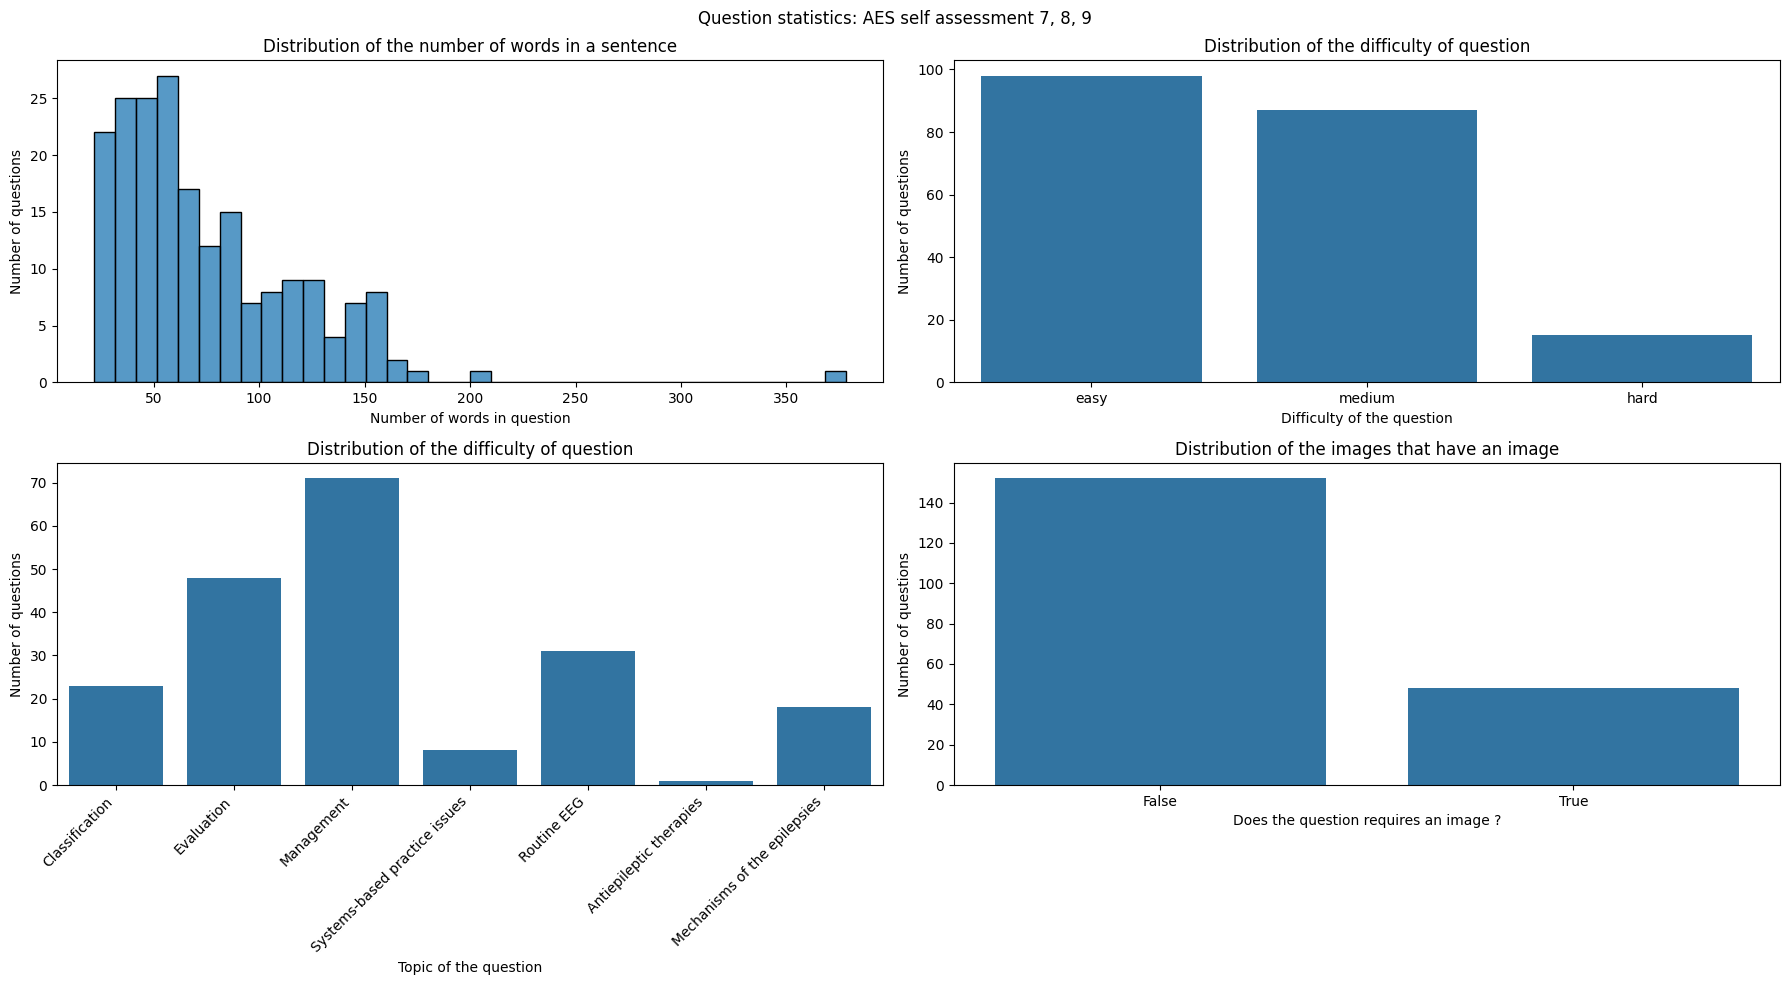

In [63]:
f, a = plt.subplots(2,2, figsize=(18, 10))

g = sns.histplot(
    data=aes,
    x="q_len",
    binwidth=10,
    ax=a[0][0]

)
g.set_xlabel("Number of words in question")
g.set_ylabel("Number of questions")
g.set_title("Distribution of the number of words in a sentence")


g = sns.countplot(
    data=aes,
    x="Difficulty",
    ax=a[0][1],
)
g.set_xlabel("Difficulty of the question")
g.set_ylabel("Number of questions")
g.set_title("Distribution of the difficulty of question")

g = sns.countplot(
    data=aes,
    x="Topic",
    ax=a[1][0],
)
g.set_xlabel("Topic of the question")
g.set_ylabel("Number of questions")
g.set_title("Distribution of the difficulty of question")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')

g = sns.countplot(
    data=aes,
    x="Is_image",
    ax=a[1][1],
)
g.set_xlabel("Does the question requires an image ?")
g.set_ylabel("Number of questions")
g.set_title("Distribution of the images that have an image")



f.suptitle("Question statistics: AES self assessment 7, 8, 9")
plt.tight_layout()